| **Feature**           | **Seasonal Pattern** | **Cyclical Pattern**       |
|-----------------------|----------------------|----------------------------|
| Repeat?               | No                   | Yes                        |
| Time Interval?        | No                   | Yes, Variable              |
| Driven by?            | Calendar             | Economic / Social Factors  |
| Predictable?          | Yes                  | No                         |
| Examples              | Holidays, Weather    | Stock Market, Sales        |


*Observed* - actrual data points over time <br>
*Residual* is the **observed** - the **predicted small residual** = good model fit


**Time series Forcasting techneuqes**:<br>
#### ***ARIMA***:<br>
ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting technique used to predict future points by understanding patterns in past data.<br>
ARIMA models are a combination of three components: AR (AutoRegressive), I (Integrated),MA (Moving Average).<br>

#### ***Prophet***:<br>
Prophet is a time series forecasting tool developed by Facebook that automatically models trends, seasonality, and holidays, making it ideal for business data with recurring patterns and irregularities.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = 'Airpassangers.csv'

df = pd.read_csv(data)
print(df)

        Date  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


In [82]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


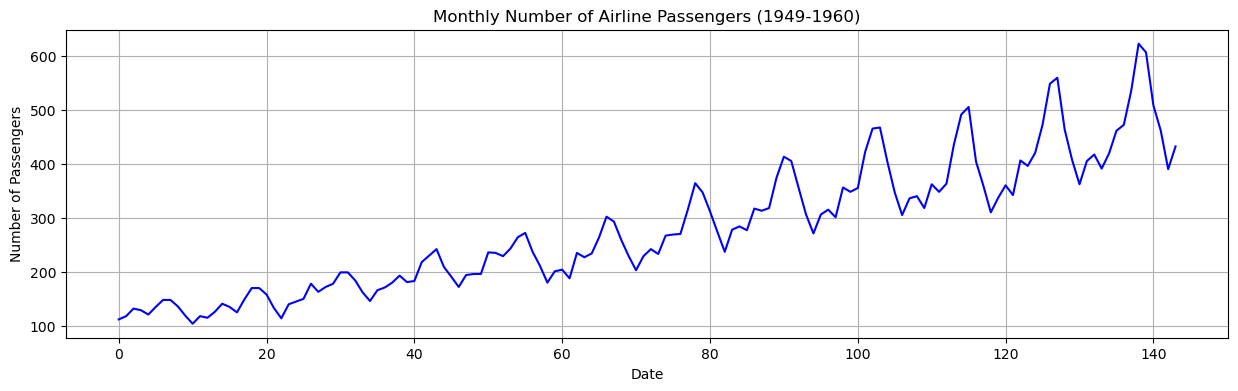

In [83]:

# Plotting the time series
plt.figure(figsize=(15,4))
plt.plot(df.index, df['Passengers'], label='Monthly Passengers', color='b')
plt.title('Monthly Number of Airline Passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)

plt.show()

In [84]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi = 100): 
        plt.figure(figsize=(15,4), dpi = dpi)
        plt.plot(x, y)
        plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
        plt.show()

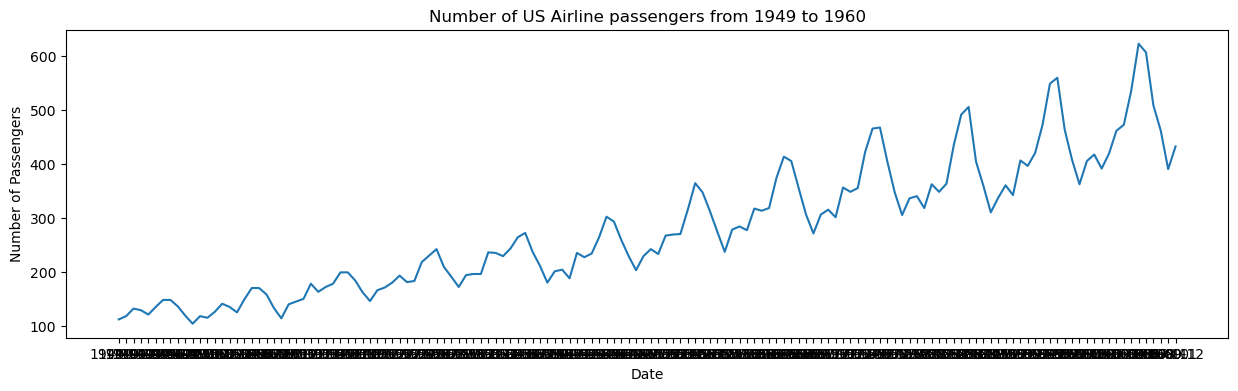

In [85]:
plot_df(df, x=df['Date'], y=df['Passengers'], title='Number of US Airline passengers from 1949 to 1960')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose 
from dateutil.parser import parse   # Multiplicative Decomposition  
multiplicative_decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=30)  # Additive Decomposition 
additive_decomposition = seasonal_decompose(df['Passengers'], model='additive', period=30)  # Plot 
plt.rcParams.update({'figure.figsize': (16,12)}) 
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16) 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16) 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
